In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_sample_images
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F

In [22]:
x = np.random.randint(0,3,10)
y = np.random.randint(0,3,10)
print(x)
print(y)

[0 2 1 0 1 0 1 0 0 2]
[0 2 0 2 0 0 2 1 1 0]


## 是是是
   中间 [^1] 喵喵喵？

In [29]:
xy = np.vstack((x,y))
xyt = xy.T
print(xyt)

[[0 0]
 [2 2]
 [1 0]
 [0 2]
 [1 0]
 [0 0]
 [1 2]
 [0 1]
 [0 1]
 [2 0]]


In [54]:
uniq,coun = np.unique(xyt,axis=0,return_counts = True)

In [60]:
xyt[np.where(coun>1)]

array([[0, 0],
       [2, 2],
       [0, 2]])

array([0, 6, 3, 2, 3, 0, 4, 1, 1, 5])

In [6]:
np.random.rand(2,2) # (y, x)

array([[0.45321381, 0.7960071 ],
       [0.18255586, 0.19108092]])

In [45]:
np.zeros((5))[:,np.newaxis] 

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [4]:
import torch

In [5]:
torch.rand(3,2)

tensor([[ 0.0373,  0.8964],
        [ 0.3493,  0.8558],
        [ 0.2538,  0.0833]])

In [9]:
ma = torch.rand(3,2)
mb = torch.rand(2,3)
torch.matmul(ma,mb)

tensor([[ 0.0648,  0.1735,  0.2877],
        [ 0.0865,  0.1089,  0.2621],
        [ 0.0321,  0.3423,  0.3977]])

- learning from data:  a short course

## __EXERCISE__5

In [7]:
# The following code is a simple visualiser.
def show_array(a):
    if a.ndim == 1: 
        a = a[:, np.newaxis]
    fig, axes = plt.subplots(1)
    fig.set_size_inches(a.shape[1]/2, a.shape[0]/2)
    axes.imshow(a)
    axes.set_xticks(np.arange(a.shape[1]))
    axes.set_yticks(np.arange(a.shape[0]))

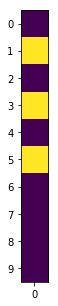

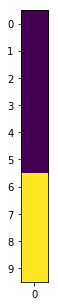

In [79]:
a = np.zeros((10, 1))
# a[d1,d2,d3][index base on before]
# [1::2]跨一格重复选择
# [1:5] 选择1~5

a[0:6][1::2]=1
show_array(a)
a[:]=0
a[6:]=1
show_array(a)

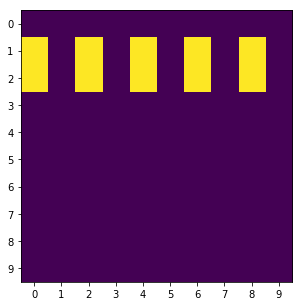

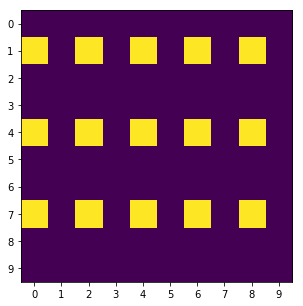

In [47]:
a = np.zeros((10, 10))
a[1:3, ::2]=1
show_array(a)

a = np.zeros((10, 10))
a[1::3, ::2]=1
show_array(a)

### Normalise the iris data so that each attribute is between  [0,1] 

In [99]:
ormalise the iris data so that each attribute is between  [0,1] 
from sklearn.datasets import load_iris
iris_np = load_iris()

#### Mean norm:
$x^{\prime} = \frac{x-\operatorname { mean } ( x ) } { \max ( x ) - \min ( x )} $

#### Rescaling:
$x^{\prime} = \frac{x-\operatorname { min } ( x ) } { \max ( x ) - \min ( x )} $

#### Standardization:
$x^{\prime} = \frac{x-\operatorname { mean } ( x ) } { std ( x ) } $

#### Standardization:
$x^{\prime} = \frac{x} { || x || } $



|| x ||  = Magnitude of a vector definition

In [107]:
def mean_norm(data):
    norm = (data - data.mean(axis=0))/(data.max(axis=0)- data.min(axis=0))
    return norm
def resc_norm(data):
    norm = (data - data.min(axis=0))/(data.max(axis=0)- data.min(axis=0))
    return norm

In [108]:
resc_norm(iris_np.data)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

# Embedding
###### one-hot
    优势：计算方便快捷、表达能力强

    劣势：维度过高，过于稀疏时，过度占用资源

###### Embedding 
1. 可以降维

    可以理解为特殊全连接层操作，跟1x1卷积核异曲同工
    e.g. (100w,10w)*(10w,20)= (100W, 20)


2. 可以升维

    对低维的数据进行升维时，可能把一些其他特征给放大了，或者把笼统的特征给分开了。同时，这个embedding是一直在学习在优化的，就使得整个拉近拉远的过程慢慢形成一个良好的观察点。


In [16]:
embedding = torch.nn.Embedding(num_embeddings=91, embedding_dim=5)

In [17]:
rm = np.zeros((5,10))
tm = torch.tensor(rm).type(torch.long)
rm2 = np.zeros((5,10))
rm2[0][0] = -1
rm2[0][1] = 2

In [18]:

tm2 = torch.tensor(rm2).type(torch.long)
print(rm2)
em = embedding(tm)
em2 = embedding(tm2)
print(em.shape)
print(em2.shape)
print(em==em2)

[[-1.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


RuntimeError: index out of range at ..\aten\src\TH/generic/THTensorEvenMoreMath.cpp:193